In [2]:
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from collections import Counter

In [3]:
dataset_folder = './datasets/train_zip/train'

In [4]:
data = {
    'filename': [],
    'width': [],
    'height': [],
    'class': [],
    'xmin': [],
    'ymin': [],
    'xmax': [],
    'ymax': []
}

In [5]:
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    filename = root.find('filename').text
    size = root.find('size')
    width = int(size.find('width').text)
    height = int(size.find('height').text)

    for obj in root.iter('object'):
        obj_class = obj.find('name').text
        bbox = obj.find('bndbox')
        xmin = int(bbox.find('xmin').text)
        ymin = int(bbox.find('ymin').text)
        xmax = int(bbox.find('xmax').text)
        ymax = int(bbox.find('ymax').text)

        data['filename'].append(filename)
        data['width'].append(width)
        data['height'].append(height)
        data['class'].append(obj_class)
        data['xmin'].append(xmin)
        data['ymin'].append(ymin)
        data['xmax'].append(xmax)
        data['ymax'].append(ymax)

In [9]:
for file in os.listdir(dataset_folder):
    if file.endswith(".xml"):
        parse_xml(os.path.join(dataset_folder, file))

In [10]:
df = pd.DataFrame(data)

,filename,width,height,class,xmin,ymin,xmax,ymax
0,apple_49.jpg,271,300,apple,15,87,255,291
1,apple_75.jpg,290,290,apple,5,31,287,276
2,apple_61.jpg,500,500,apple,234,132,416,343
3,orange_3.jpg,250,250,orange,103,104,224,247
4,orange_3.jpg,250,250,orange,97,1,203,115
...,...,...,...,...,...,...,...,...
925,apple_3.jpg,1000,708,apple,642,35,907,269
926,apple_44.jpg,0,0,apple,21,27,319,315
927,apple_50.jpg,300,227,apple,147,45,288,202
928,apple_50.jpg,300,227,apple,46,40,148,149


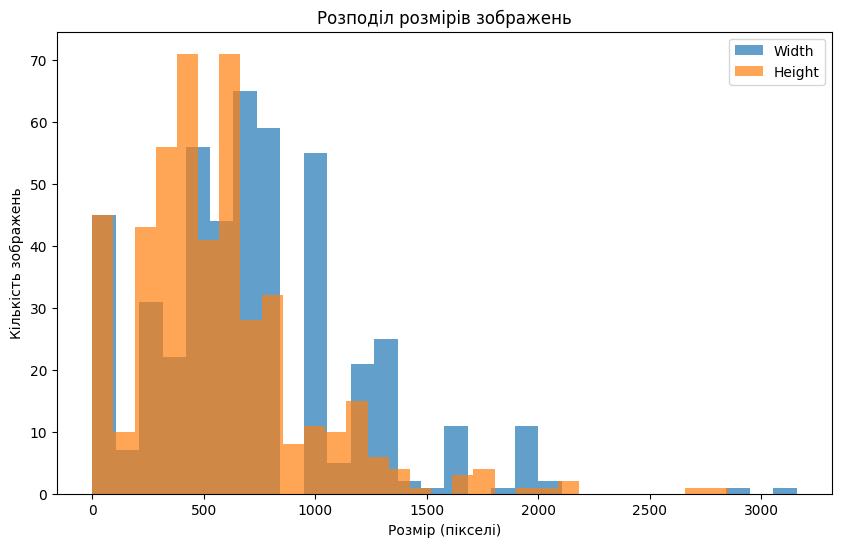

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df['width'], bins=30, alpha=0.7, label='Width')
plt.hist(df['height'], bins=30, alpha=0.7, label='Height')
plt.xlabel('Розмір (пікселі)')
plt.ylabel('Кількість зображень')
plt.title('Розподіл розмірів зображень')
plt.legend()
plt.show()

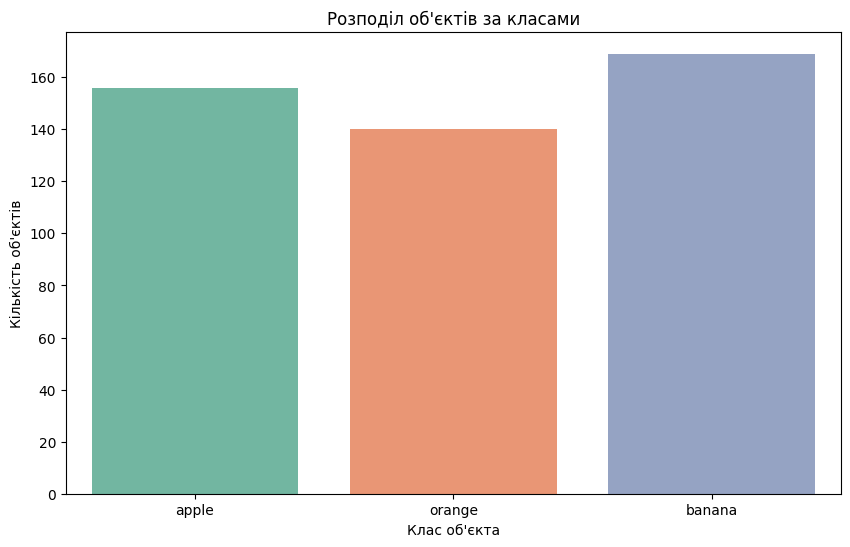

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=df, palette='Set2')
plt.title('Розподіл об\'єктів за класами')
plt.xlabel('Клас об\'єкта')
plt.ylabel('Кількість об\'єктів')
plt.show()

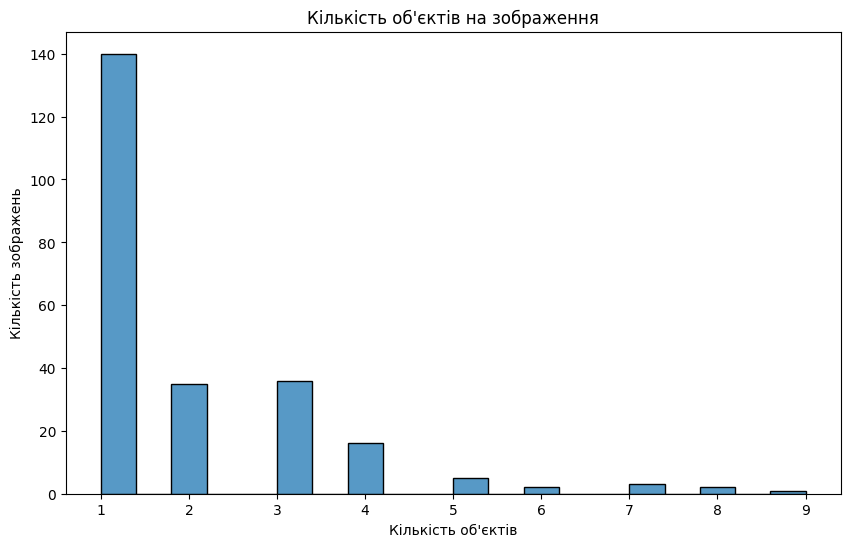

In [11]:
objects_per_image = df.groupby('filename')['class'].count().reset_index(name='object_count')

plt.figure(figsize=(10, 6))
sns.histplot(objects_per_image['object_count'], bins=20, kde=False)
plt.title('Кількість об\'єктів на зображення')
plt.xlabel('Кількість об\'єктів')
plt.ylabel('Кількість зображень')
plt.show()

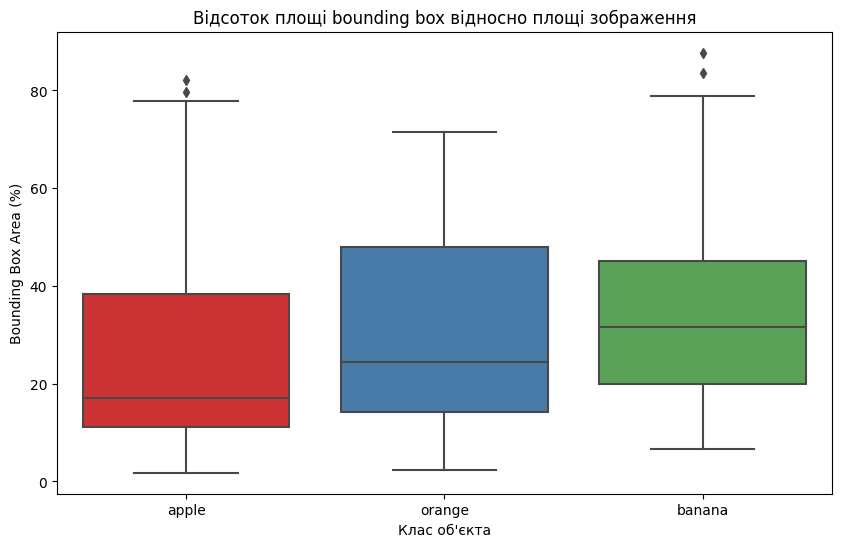

In [12]:
df['image_area'] = df['width'] * df['height']
df['bbox_percentage'] = (df['area'] / df['image_area']) * 100

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='bbox_percentage', data=df, palette='Set1')
plt.title('Відсоток площі bounding box відносно площі зображення')
plt.xlabel('Клас об\'єкта')
plt.ylabel('Bounding Box Area (%)')
plt.show()

Статистика по розширенню зображень (ширина, висота, кількість зображень):

     width  height  count
0        0       0     45
1      166     171      1
2      196     160      4
3      196     250      1
4      200     195      1
..     ...     ...    ...
170   1999    1200      3
171   2048    2728      1
172   2091    1394      1
173   2850    2850      1
174   3160    2072      1

[175 rows x 3 columns]


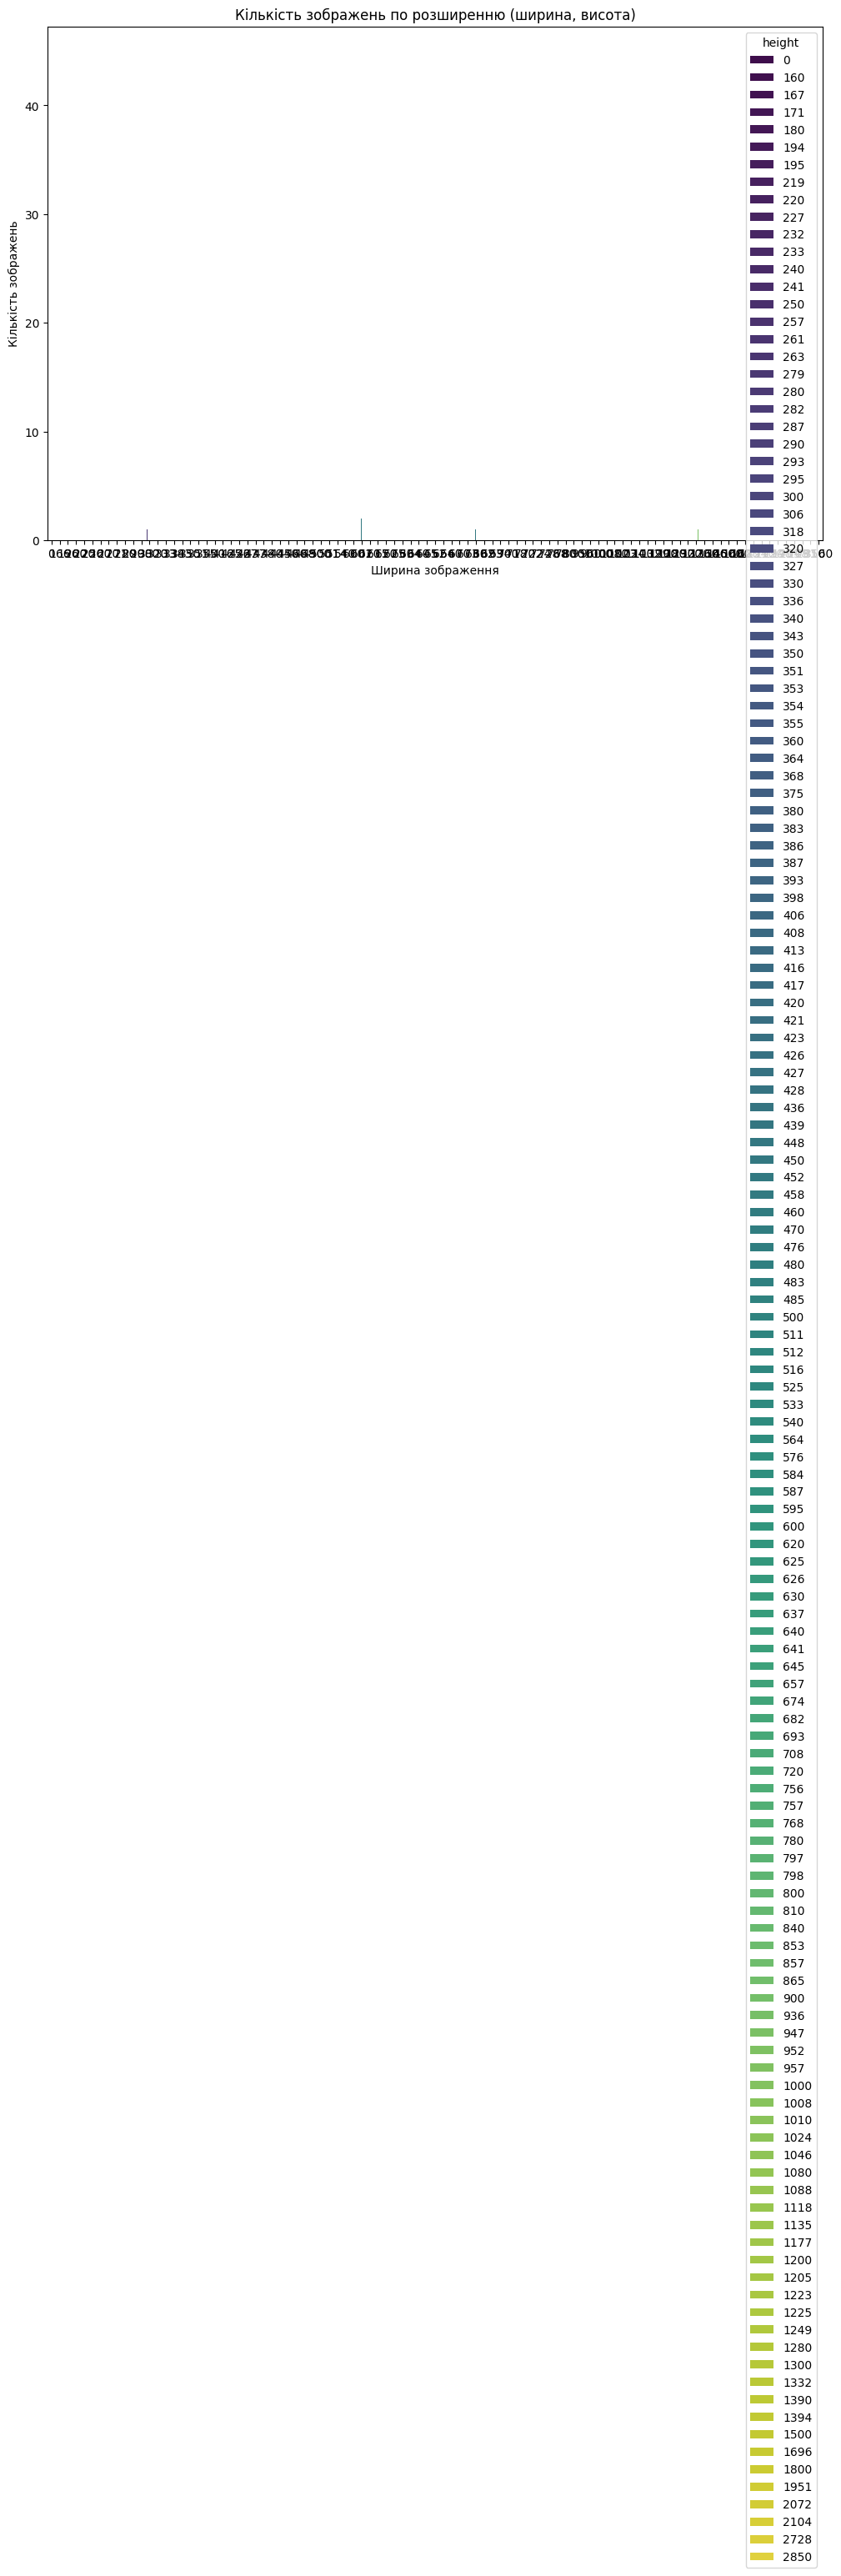

In [13]:
image_resolutions = df.groupby(['width', 'height']).size().reset_index(name='count')

print("Статистика по розширенню зображень (ширина, висота, кількість зображень):\n")
print(image_resolutions)

plt.figure(figsize=(12, 8))
sns.barplot(x='width', y='count', hue='height', data=image_resolutions, palette='viridis')
plt.title('Кількість зображень по розширенню (ширина, висота)')
plt.xlabel('Ширина зображення')
plt.ylabel('Кількість зображень')
plt.show()